# Day 8: Gradient Descent

# Understanding Gradient Descent and the Visualization

## What is Gradient Descent?
Gradient Descent is an optimization algorithm used to find the minimum of a function. It is commonly used in machine learning to minimize the cost function, helping models learn the best parameters. The idea is simple:

1. Start with random parameter values.
2. Compute the gradient (derivative) of the cost function.
3. Update parameters by moving in the direction that reduces the cost.
4. Repeat until the cost function stops decreasing (convergence).

Mathematically, parameter updates follow this formula:

$$ \theta = \theta - \alpha \cdot \frac{\partial J}{\partial \theta} $$

Where:
- $\theta$ are the model parameters.
- $\alpha$ is the learning rate (step size).
- $\frac{\partial J}{\partial \theta}$ is the gradient of the cost function $J$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
#Generate a parabolic DataSet
np.random.seed(42)
X = 2 * np.random.rand(100,1) - 1
y = 4 + 3 * X**2 + np.random.randn(100,1)

In [3]:
#Prepare feature matrix (include quadratic term)
X_b = np.c_[np.ones((100,1)),X, X**2]

In [12]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y ))
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    theta_history = []

    for i in range(iterations):
        gradients = (1/m) * X.T.dot(X.dot(theta) - y )
        theta -= learning_rate * gradients
        cost_history.append(compute_cost(X, y, theta))
        if i % (iterations // 10) == 0:
            theta_history.append(theta.copy())

    return theta, cost_history, theta_history

In [13]:
#Initialize theta
#Three parameters
theta = np.random.randn(3,1) 

In [14]:
#Hyperparameters
learning_rate = 0.01
iterations = 1000

In [15]:
#Run Gradient Descent
optimal_theta, cost_history, theta_history = gradient_descent(X_b, y, theta, learning_rate, iterations)

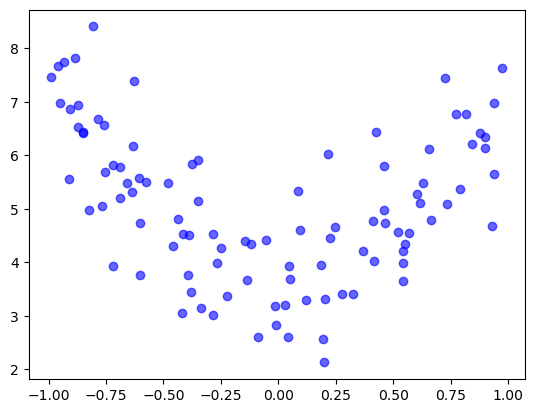

In [16]:
#Plot original parabolic Data
plt.scatter(X,y,color='blue', label='Original Data', alpha=0.6)

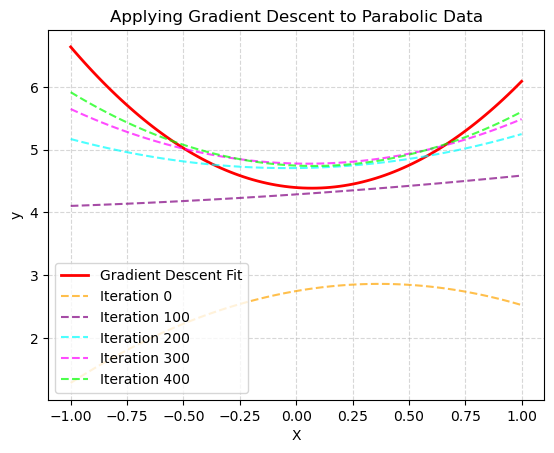

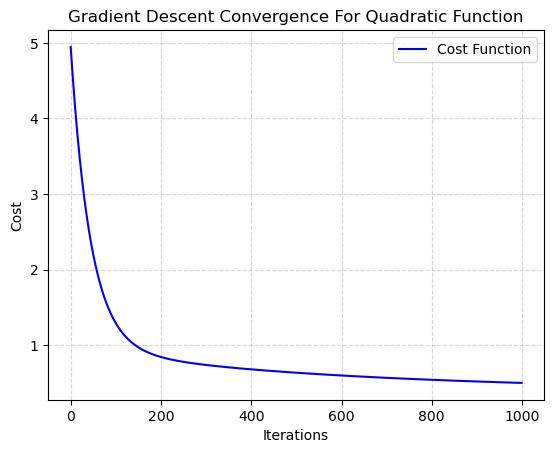

Optimal Parameters: [ 4.39598654 -0.27408867  1.96709032]


In [18]:
#Plot gradient descent results
X_fit = np.linspace(-1,1, 100).reshape(-1,1)
X_fit_b = np.c_[np.ones((100,1)), X_fit, X_fit**2]
y_pred = X_fit_b.dot(optimal_theta)
plt.plot(X_fit, y_pred, color='red', linewidth=2, label='Gradient Descent Fit')

#Show the relationship between parabolic data and gradient descent
colors = ['orange','purple','cyan','magenta','lime']
for idx, theta_step in enumerate(theta_history[:5]):
    y_step = X_fit_b.dot(theta_step)
    plt.plot(X_fit, y_step, linestyle='dashed', color=colors[idx], alpha=0.7, label=f'Iteration {idx * (iterations // 10)}')

#Visualization
plt.xlabel('X')
plt.ylabel('y')
plt.title('Applying Gradient Descent to Parabolic Data')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#Plot Cost function decrease
plt.plot(range(iterations), cost_history, label='Cost Function', color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Convergence For Quadratic Function')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print(f'Optimal Parameters: {optimal_theta.ravel()}')

### This plot demonstrates how Gradient Descent optimizes a quadratic (parabolic) function:
Original Data Points (not shown but present in code) represent the true quadratic relationship with noise. <br>
**Gradient Descent Fit (Red Line)** – This is the final model after optimization.<br>
**Dashed Lines (Iterations 0, 100, 200, etc.)** – These show the model’s predictions at different stages of gradient descent:<br>
**Iteration 0 (Yellow)**: The initial random guess.<br>
**Iteration 100 (Purple)**: The model is adjusting but still far from the true curve.<br>
**Iteration 200, 300, 400 (Cyan, Magenta, Green)**: The model progressively improves and converges towards the red final fit.<br>
The visualization shows how gradient descent moves step by step, refining the parameters until they match the true parabolic shape of the data. 🚀